# Predecir los sueldos de la NBA 
 
Trabajaremos en dos archivos. El primero contiene jugadores y las estadísticas correspondientes. El segundo proporciona información estacional sobre sus salarios de 1985 a 2018. Su objetivo es construir un modelo que prediga los salarios de la NBA. Siéntase libre de trabajar solo con un subconjunto de jugadores o atributos. Más detalles [aquí](https://www.kaggle.com/abdullahsahin/nba-salaries). 

In [1]:
import pandas as pd
players = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectNBA/data/players.csv")
players

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,...,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,...,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,...,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,zizican01,"January 4, 1997","Split, Croatia",0.6,58.3,-,70.8,91,17.5,6.4,...,23rd overall,1st round,Boston Celtics,2016,6-11,NaN,Ante Zizic,Center,Right,254lb
4681,zoetji01,"December 20, 1953","Uxbridge, Canada",0.1,20.0,-,-,7,-0.8,0.3,...,NaN,NaN,NaN,NaN,7-1,"Port Perry in Port Perry, Canada",Jim Zoet,Center,Right,240lb
4682,zopfbi01,"June 7, 1948",NaN,1.4,36.3,NaN,55.6,53,9.6,2.2,...,33rd overall,2nd round,Milwaukee Bucks,1970,6-1,"Monaca in Monaca, Pennsylvania",Bill Zopf,Point Guard,Right,170lb
4683,zubaciv01,"March 18, 1997","Mostar, Bosnia and Herzegovina",0.8,54.0,0.0,76.1,140,17.6,6.9,...,32nd overall,2nd round,Los Angeles Lakers,2016,7-1,NaN,Ivica Zubac,Center,Right,240lb


In [2]:
salaries = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectNBA/data/salaries_1985to2018.csv")
salaries.loc[2500]

league                 NBA
player_id        colesbi01
salary              290000
season             1990-91
season_end            1991
season_start          1990
team            Miami Heat
Name: 2500, dtype: object

In [8]:
promedios = salaries.groupby('player_id')['salary'].mean().reset_index()

In [10]:
promedios

,player_id,salary
0,abdelal01,5.688000e+05
1,abdulka01,2.140000e+06
2,abdulma02,2.205500e+06
3,abdulta01,3.798280e+06
4,abdursh01,8.715091e+06
...,...,...
2403,zidekge01,6.937333e+05
2404,zimmest01,9.500000e+05
2405,zipsepa01,1.031306e+06
2406,zizican01,1.645200e+06


# Limpieza de dataset

In [ ]:
#Esto es lo que se hizo para armar el dataframe!!


#X = players.dropna()
#X['draft_year'] = X['draft_year'].astype(int)
#salaries['season_start'] = salaries['season_start'].astype(int)
#X = X.drop(columns=['birthDate','birthPlace','college','highSchool','name','draft_team','draft_round','draft_pick'])

#df_merged = pd.merge(promedios,X,left_on = 'player_id',right_on='_id',how = 'inner')
#df_merged = df_merged.drop(columns= ['_id'])
#df_merged['weight'] = df_merged['weight'].str.replace('lb','').astype(float)

#df_merged['career_AST'] = pd.to_numeric(df_merged['career_AST'], errors='coerce')
#df_merged['career_FG%'] = pd.to_numeric(df_merged['career_FG%'], errors='coerce')
#df_merged['career_PTS'] = pd.to_numeric(df_merged['career_PTS'], errors='coerce')
#df_merged['career_TRB'] = pd.to_numeric(df_merged['career_TRB'], errors='coerce')
#df_merged['career_WS'] = pd.to_numeric(df_merged['career_WS'], errors='coerce')
# Verificar si ahora todas las columnas son numéricas
#print(df_merged[['salary', 'career_AST', 'career_FG%', 'career_PTS', 'career_TRB', 'career_WS']].dtypes)

#df_merged.to_csv('df_nba_sueldos.csv')

salary        float64
career_AST    float64
career_FG%    float64
career_PTS    float64
career_TRB    float64
career_WS     float64
dtype: object


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


#df_merged['career_PTS'] = scaler.fit_transform(df_merged[['career_PTS']])
df_merged['career_TRB'] = scaler.fit_transform(df_merged[['career_TRB']])
df_merged['career_WS'] = scaler.fit_transform(df_merged[['career_WS']])

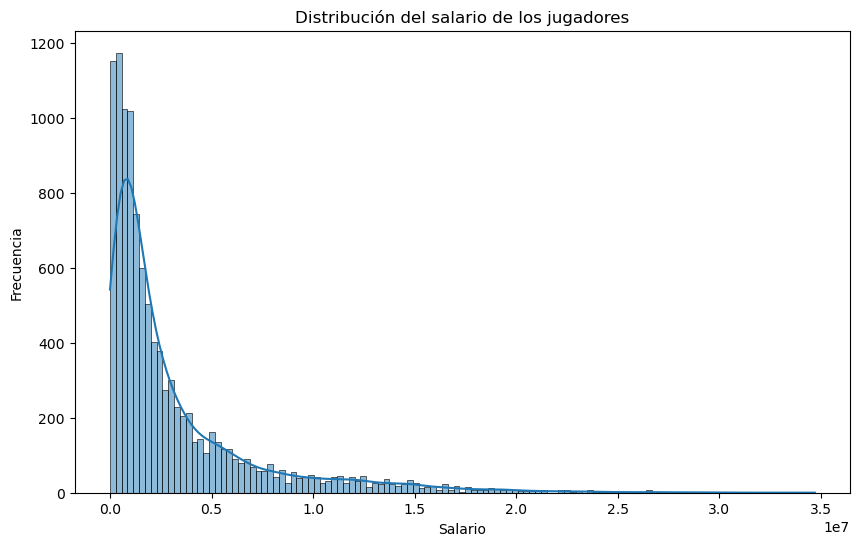

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df_merged['salary'], kde=True)
plt.title('Distribución del salario de los jugadores')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()


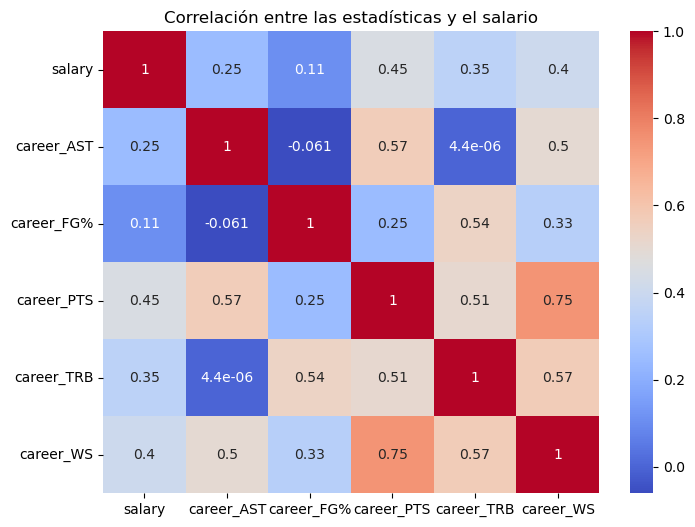

In [111]:
correlation_matrix = df_merged[['salary', 'career_AST', 'career_FG%', 'career_PTS', 'career_TRB', 'career_WS']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre las estadísticas y el salario')
plt.show()


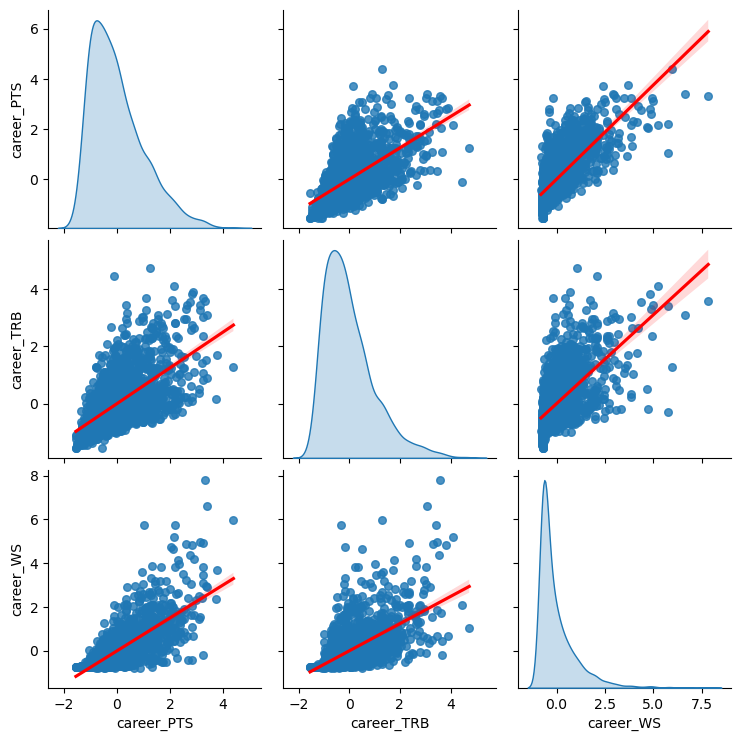

In [40]:
import seaborn as sns
sns.pairplot(df_merged[['career_PTS', 'career_TRB','career_WS']], kind='reg', 
             plot_kws={'ci': 95, 'line_kws': {'color': 'red'}, 'scatter_kws': {'s': 30}},
             diag_kind='kde')

In [47]:
# Crear una función para convertir 'pies-pulgadas' a pies decimales
def convertir_a_pies_decimal(altura_str):
    pies, pulgadas = map(int, altura_str.split('-'))
    return pies + pulgadas / 12

# Aplicar la conversión a la columna 'height'
df_merged['height'] = df_merged['height'].apply(convertir_a_pies_decimal)

# Verifica que la conversión se haya realizado correctamente
print(df_merged[['height']].head())


     height
0  6.833333
1  7.166667
2  6.083333
3  6.500000
4  6.750000


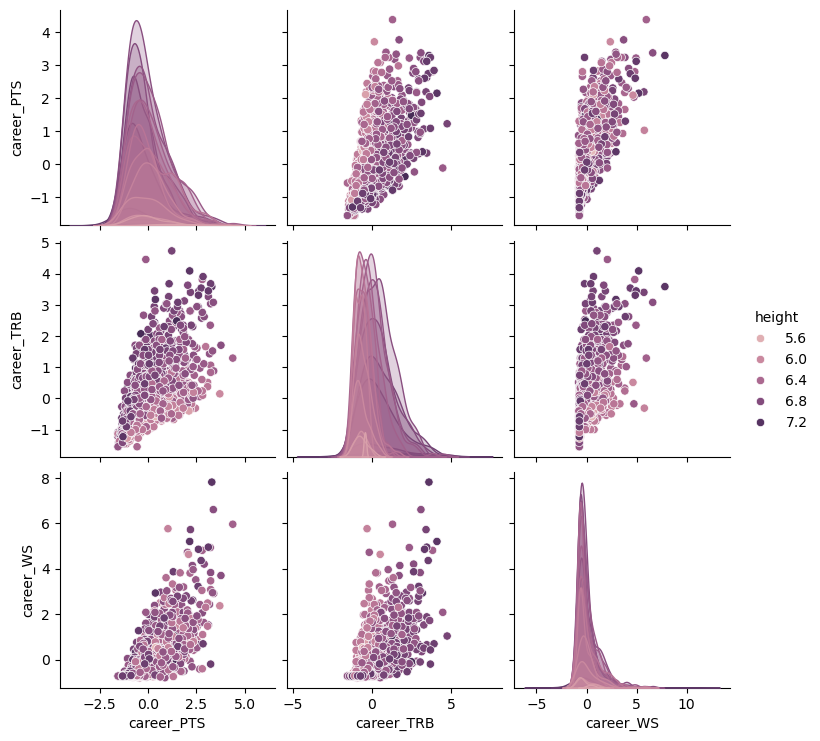

In [51]:
import seaborn as sns

# Crear el pairplot con un hue numérico para la altura de los jugadores
sns.pairplot(df_merged[['career_PTS', 'career_TRB','career_WS', 'height']], hue='height')


# Train

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#df_merged = df_merged.dropna()
X = df_merged[['career_PTS', 'career_TRB', 'career_WS']]
y = df_merged['salary']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=20)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict (X_test)


mse = mean_squared_error(y_test,y_pred)
print ("MSE: ", mse)
r2_s = r2_score(y_test,y_pred)
print ("R2 Score: ",r2_s)

MSE:  4427193660113.703
R2 Score:  0.3993886194106907


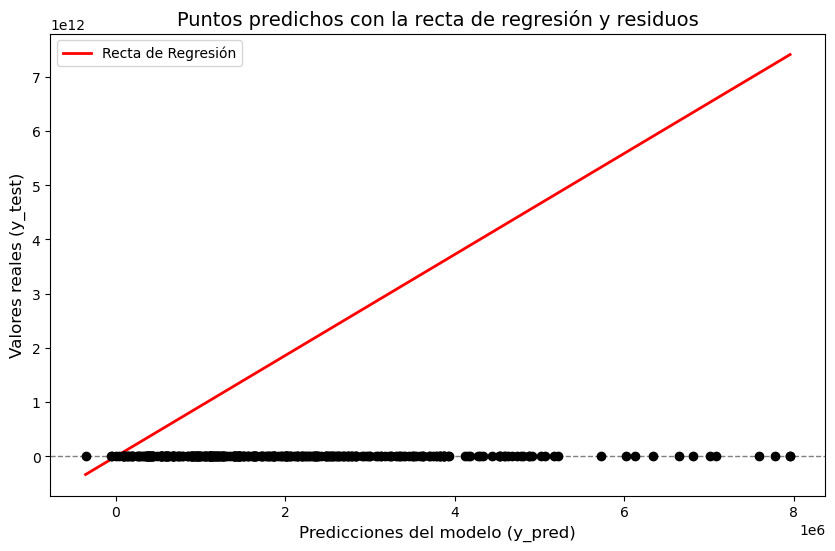

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calcular los residuos
residuos = y_test - y_pred

# Graficar los puntos predichos y la recta de regresión
plt.figure(figsize=(10, 6))

# Graficar la recta de regresión
plt.plot(np.sort(y_pred), model.intercept_ + model.coef_[0] * np.sort(y_pred), color='red', linewidth=2, label='Recta de Regresión')

# Graficar los puntos de predicción y sus residuos
for i in range(len(y_pred)):
    #plt.plot([y_pred[i], y_pred[i]], [y_test.iloc[i], y_pred[i]], color='black', linestyle='--', linewidth=1)  # Línea de residuos
    plt.scatter(y_pred[i], y_test.iloc[i], color='black', zorder=5)  # Puntos

# Detalles del gráfico
plt.title('Puntos predichos con la recta de regresión y residuos', fontsize=14)
plt.xlabel('Predicciones del modelo (y_pred)', fontsize=12)
plt.ylabel('Valores reales (y_test)', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.show()


